In [26]:
import matplotlib.pyplot as plt
import numpy as np
import astropy
from astropy import units
from astropy.coordinates import SkyCoord
from astropy.table import Table
import scipy
import numpy as np
from tqdm import tqdm
import indigo
plt.style.use(indigo.mplstyle)


In [27]:
recoverability = []

dataset_main = Table.read('./02_results/GalacticDWDBeaming.ecsv')
dataset_main = dataset_main[dataset_main['r']<=20]

for n_seed in range(10):
    dataset = dataset_main.copy()
    dataset['beaming_falseAlarmProbab'] = dataset_main['beaming_falseAlarmProbab'][:,n_seed]
    dataset['beaming_period'] = dataset['beaming_period'][:,n_seed]

    dataset = dataset[(-0.03<dataset['beaming_falseAlarmProbab'])*\
                      (dataset['beaming_falseAlarmProbab']<1e-5)*\
                      (dataset['r']<20)]

    dataset = dataset['M1','M2','logTeff1','logTeff2','period_hour','r','inclination']
    #dataset['logTeff1'] = 10**dataset['logTeff1']
    #dataset['logTeff2'] = 10**dataset['logTeff2']
    dataset['period_hour'] = dataset['period_hour']*60

    recoverability.append(np.array([list(row) for row in dataset]))

recoverability = np.concatenate(recoverability)
len(recoverability)

717

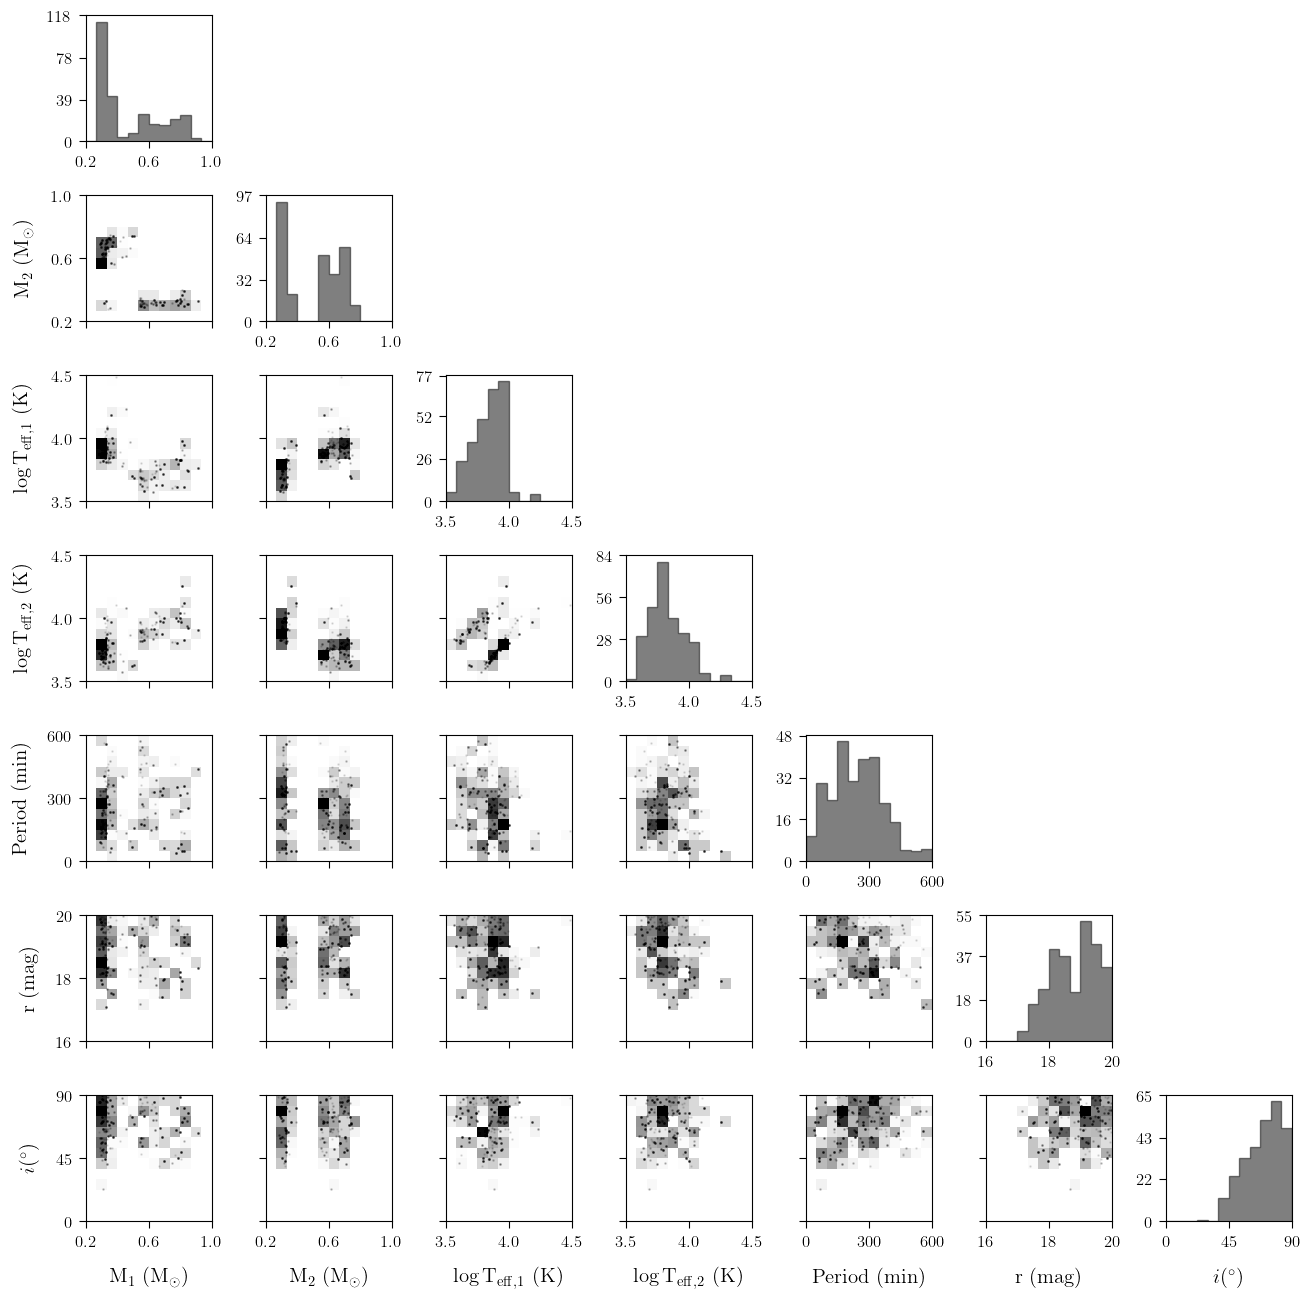

In [28]:
bins = 12
N_DIM = 7
PARAM_LABELS = [r"M$_1$ (M$_\odot$)", r"M$_2$ (M$_\odot$)", \
                r"$\mathrm{\log T_{eff,1}}$ (K)", r"$\mathrm{\log T_{eff,2}}$ (K)", \
                r"Period (min) ", r"$\mathrm{r}$ (mag)", r"$i(^{\circ})$ "]

limits = [[0.2,1.],[0.2,1.],[3.5,4.5],[3.5,4.5],[0,600],[16,20],[0,90]]

for ii in range(7):
    recoverability = recoverability[(limits[ii][0]<=recoverability[:,ii])*\
                                    (recoverability[:,ii]<=limits[ii][1])]

fig, axes = plt.subplots(N_DIM, N_DIM, figsize=(N_DIM*2, N_DIM*2), sharex='col')

fig.subplots_adjust(left=0.08, right=0.98,bottom=0.08, top=0.98,hspace=0.0, wspace=0.0)

for row in range(N_DIM):
    for col in range(N_DIM):
        ax = axes[row, col]
        
        ax.tick_params(axis='both', which='major', length=5, labelsize=12)
        
        if col > row:
            ax.set_visible(False)
            continue
            
        elif col == row:
            
            pos = ax.get_position()
            new_pos = [pos.x0 + pos.width * 0.1, pos.y0 + pos.height * 0.05, \
                       pos.width * 0.7, pos.height * 0.7] # Shrink width, increase height
            ax.set_position(new_pos)
            
            ax.hist(recoverability[:,col], \
                    bins=np.linspace(limits[col][0],limits[col][1],bins+1), \
                    histtype='step', fill=True, color='k', edgecolor='k', alpha=0.5, \
                    weights=np.ones(len(recoverability[:,col]))*0.1*4)
            _ymin,_ymax = ax.set_ylim()
            idx = np.round(np.linspace(_ymin,_ymax, 4),0)
            ax.set_yticks(idx)  
        
        else:
            
            pos = ax.get_position()
            new_pos = [pos.x0 + pos.width * 0.1, pos.y0 + pos.height * 0.05, \
                       pos.width * 0.7, pos.height * 0.7]
            ax.set_position(new_pos)
                        
            ax.hist2d(recoverability[:,col], recoverability[:,row], \
                      bins=[np.linspace(limits[col][0],limits[col][1],bins+1),\
                            np.linspace(limits[row][0],limits[row][1],bins+1)],\
                      cmap='binary')
            
            ax.scatter(recoverability[:,col], recoverability[:,row], \
                       color='k', marker='.', s=3, alpha=0.1, rasterized=True)
            
            ax.set_ylim(*limits[row])
            
            idx = np.round(np.linspace(limits[row][0], limits[row][1], 3),1)
            ax.set_yticks(idx)
            
        ax.set_xlim(*limits[col])
              
        idx = np.round(np.linspace(limits[col][0], limits[col][1], 3),1)
        ax.set_xticks(idx)      
        
        if row < N_DIM - 1:
            ax.tick_params(axis='x', labelbottom=False)
        else:
            ax.set_xlabel(PARAM_LABELS[col], fontsize=15, labelpad=12)

        if col > 0 or row == 0:
            ax.tick_params(axis='y', labelleft=False)
        else:
            ax.set_ylabel(PARAM_LABELS[row], fontsize=15, labelpad=12)
            
        if col == row:
            ax.tick_params(axis='y', labelleft=True)
            ax.tick_params(axis='x', labelbottom=True)

plt.savefig('02_Results/corner_stellarParams.pdf',bbox_inches='tight')

3.9614248


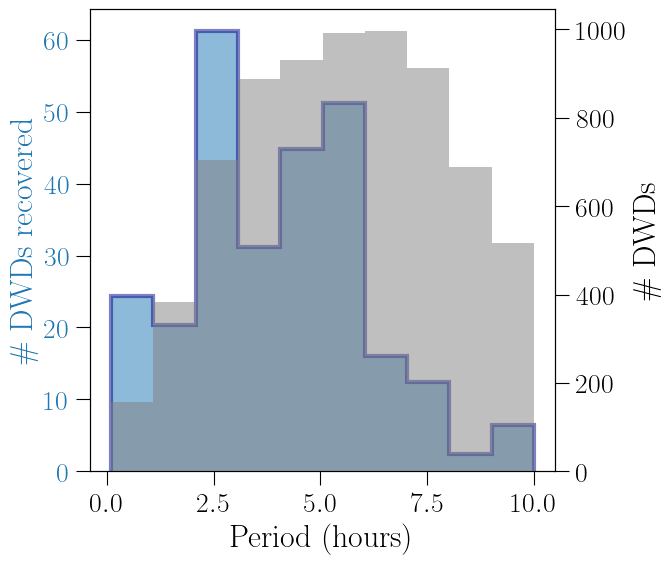

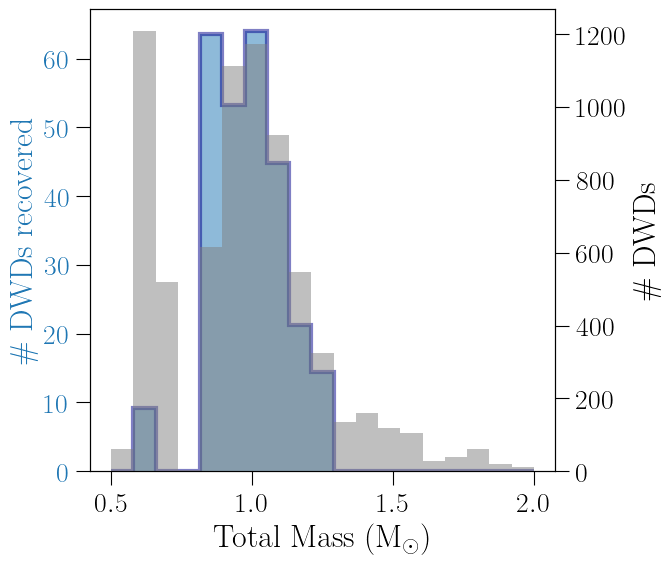

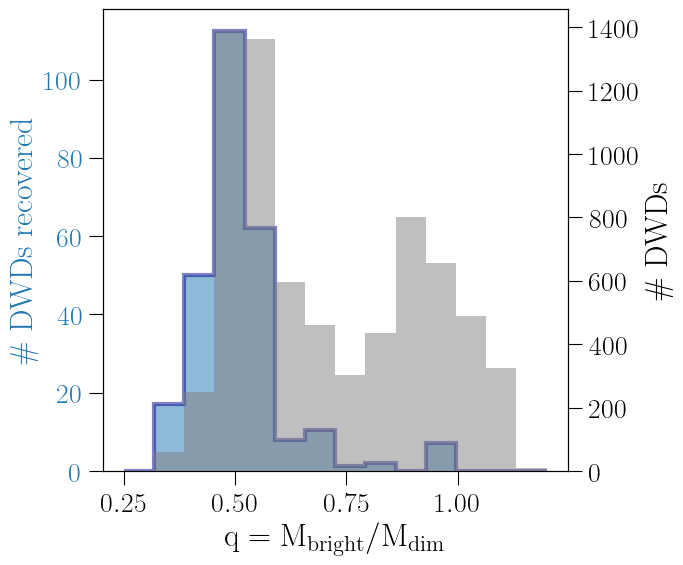

In [36]:
recoverability = []

dataset_main = Table.read('./02_results/GalacticDWDBeaming.ecsv')
dataset_main = dataset_main[(dataset_main['r']<=20)*(dataset_main['period_hour']<10)]

for n_seed in range(10):
    dataset = dataset_main.copy()
    dataset['beaming_falseAlarmProbab'] = dataset_main['beaming_falseAlarmProbab'][:,n_seed]
    dataset['beaming_period'] = dataset['beaming_period'][:,n_seed]

    dataset = dataset[(-0.03<dataset['beaming_falseAlarmProbab'])*\
                      (dataset['beaming_falseAlarmProbab']<1e-5)*\
                      (dataset['r']<20)]

    dataset = dataset['M1','M2','logTeff1','logTeff2','r1','r2','period_hour']
    #dataset['logTeff1'] = 10**dataset['logTeff1']
    #dataset['logTeff2'] = 10**dataset['logTeff2']
    dataset['period_hour'] = dataset['period_hour']*60

    recoverability.append(np.array([list(row) for row in dataset]))

recoverability = np.concatenate(recoverability)
len(recoverability)


fig, ax1 = plt.subplots()


ax2 = ax1.twinx()

ax1.hist(recoverability[:,-1]/60,weights=np.ones(len(recoverability[:,-1]))*0.1*4,\
         bins=np.linspace(0.1,10,11),alpha=0.5,color='C0',ec='darkblue',histtype='step',\
         fill=True,linewidth=3,zorder=1);
ax1.set_ylabel(r'\# DWDs recovered', color='C0')
ax1.tick_params(axis='y', labelcolor='C0')

print(np.median(recoverability[:,-1]/60))

ax1.set_xlabel('Period (hours)')

ax2.hist(dataset_main['period_hour'][dataset_main['period_hour']<10],bins=np.linspace(0.1,10,11),color='grey',\
         weights=np.ones(len(dataset_main['period_hour'][dataset_main['period_hour']<10]))*4,alpha=0.5);

ax2.set_ylabel(r'\# DWDs', color='k')
ax2.tick_params(axis='y', labelcolor='k')

#ax2.tick_params(labelright=False)

fig.savefig('02_Results/periodComparison.pdf',bbox_inches='tight')

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.hist((recoverability[:,0]+recoverability[:,1]),weights=np.ones(len(recoverability[:,0]))*0.1*4,\
         bins=np.linspace(0.5,2,20),alpha=0.5,color='C0',ec='darkblue',histtype='step',\
         fill=True,linewidth=3,zorder=1);
ax1.set_ylabel(r'\# DWDs recovered', color='C0')
ax1.tick_params(axis='y', labelcolor='C0')

ax1.set_xlabel(r'Total Mass $\mathrm{(M_{\odot})}$')

ax2.hist(dataset_main['M1']+dataset_main['M2'],bins=np.linspace(0.5,2,20),color='grey',\
         weights=np.ones(len(dataset_main['M1']))*4,alpha=0.5);

ax2.set_ylabel(r'\# DWDs', color='k')
ax2.tick_params(axis='y', labelcolor='k')

#ax2.tick_params(labelright=False)

fig.savefig('02_Results/totalMassComparison.pdf',bbox_inches='tight')


###

m_bright = np.transpose([list(dataset_main['M1']),list(dataset_main['M2'])])[range(len(dataset_main['M1'])),\
                np.argmin([list(dataset_main['r1']),list(dataset_main['r2'])],axis=0)]
m_dim = np.transpose([list(dataset_main['M1']),list(dataset_main['M2'])])[range(len(dataset_main['M1'])),\
                np.argmax([list(dataset_main['r1']),list(dataset_main['r2'])],axis=0)]

m_bright_recover = np.transpose([list(recoverability[:,0]),list(recoverability[:,1])])[range(len(recoverability[:,0])),\
                np.argmin([list(recoverability[:,-3]),list(recoverability[:,-2])],axis=0)]
m_dim_recover = np.transpose([list(recoverability[:,0]),list(recoverability[:,1])])[range(len(recoverability[:,0])),\
                np.argmax([list(recoverability[:,-3]),list(recoverability[:,-2])],axis=0)]


fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.hist((m_bright_recover/m_dim_recover),weights=np.ones(len(m_bright_recover))*0.1*4,\
         bins=np.linspace(0.25,1.2,15),alpha=0.5,color='C0',ec='darkblue',histtype='step',\
         fill=True,linewidth=3,zorder=1);
ax1.set_ylabel(r'\# DWDs recovered', color='C0')
ax1.tick_params(axis='y', labelcolor='C0')

ax1.set_xlabel(r'$\mathrm{q = M_{bright} / M_{dim}}$')

ax2.hist(m_bright/m_dim,bins=np.linspace(0.25,1.2,15),color='grey',\
         weights=np.ones(len(m_bright))*4,alpha=0.5);

ax2.set_ylabel(r'\# DWDs', color='k')
ax2.tick_params(axis='y', labelcolor='k')

#ax2.tick_params(labelright=False)

fig.savefig('02_Results/massRatioComparison.pdf',bbox_inches='tight')

In [30]:
recoverability = []

dataset_main = Table.read('./02_results/GalacticDWDBeaming.ecsv')

for n_seed in range(10):
    dataset = dataset_main.copy()
    dataset['beaming_falseAlarmProbab'] = dataset_main['beaming_falseAlarmProbab'][:,n_seed]
    dataset['beaming_period'] = dataset['beaming_period'][:,n_seed]

    dataset = dataset[(-0.03<dataset['beaming_falseAlarmProbab'])*\
                      (dataset['beaming_falseAlarmProbab']<0.003)*\
                      (dataset['u']<20)]

    dataset = dataset['M1','M2','logTeff1','logTeff2','d_ICRS','z_cylindrical','age']

    recoverability.append(np.array([list(row) for row in dataset]))

recoverability = np.concatenate(recoverability)
len(recoverability)

830

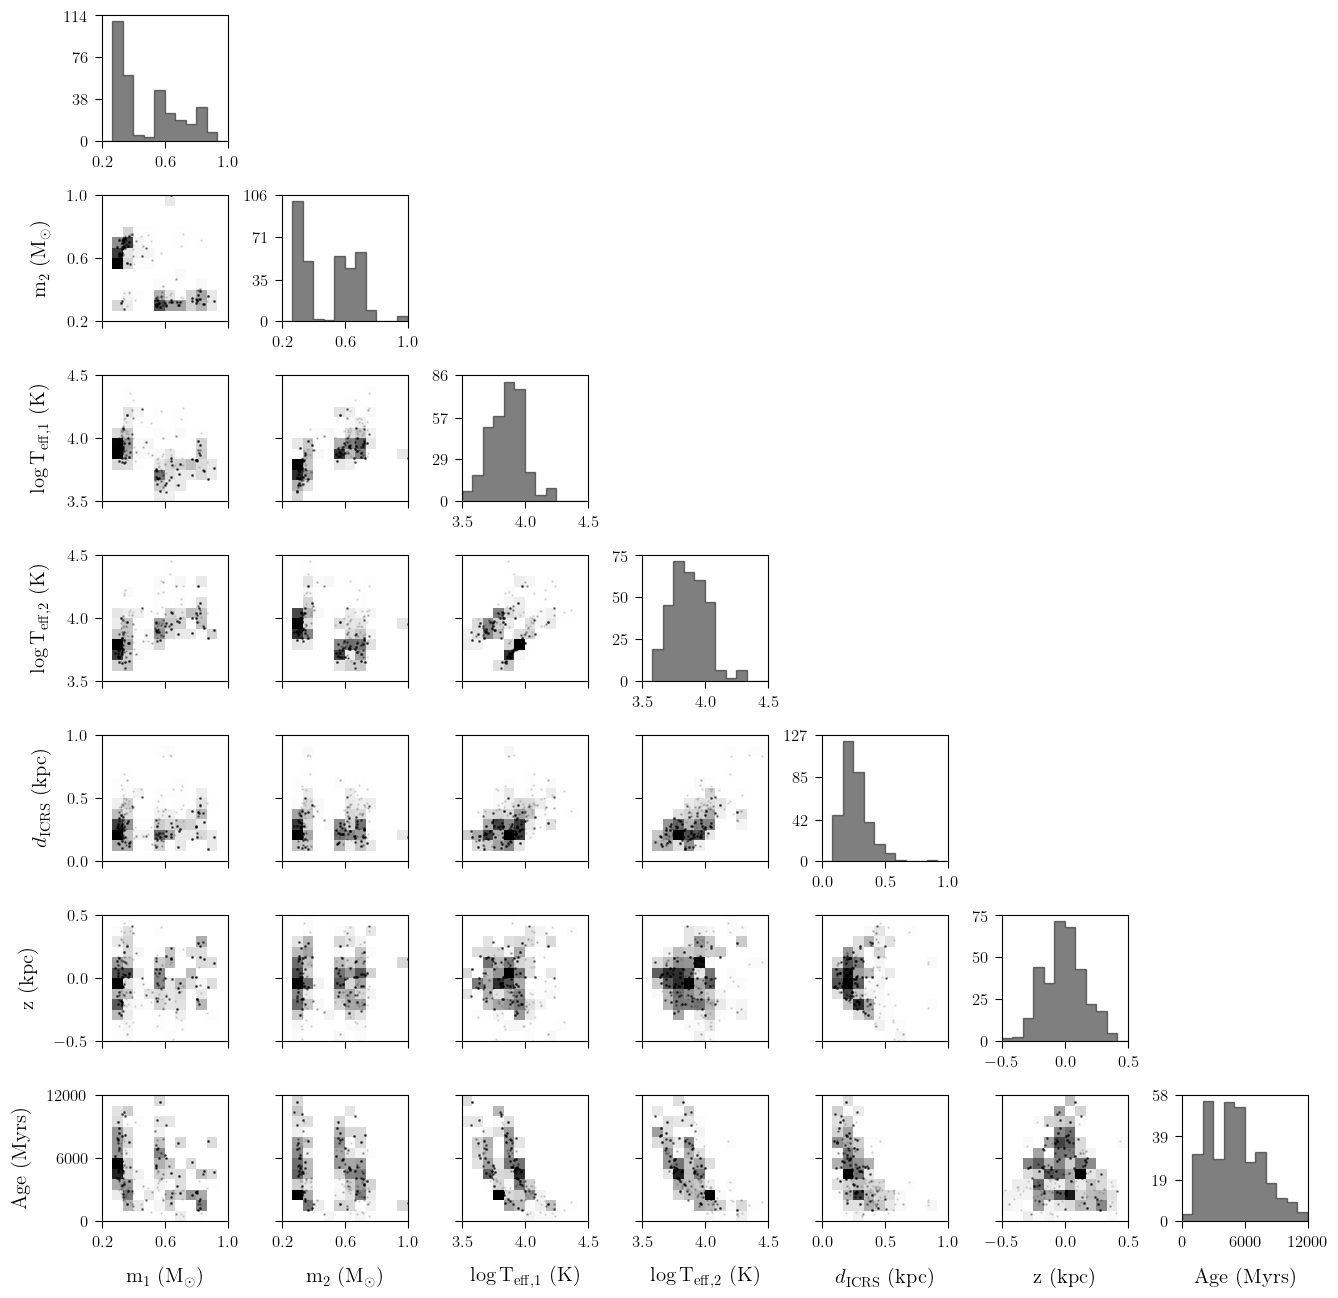

In [31]:
bins = 12
N_DIM = 7
PARAM_LABELS = [r"m$_1$ (M$_\odot$)", r"m$_2$ (M$_\odot$)", \
                r"$\mathrm{\log T_{eff,1}}$ (K)", r"$\mathrm{\log T_{eff,2}}$ (K)",\
                r"$d_\mathrm{ICRS}$ (kpc)", r"z (kpc)", r"Age (Myrs)"]

limits = [[0.2,1.],[0.2,1.],[3.5,4.5],[3.5,4.5],[0,1],[-0.5,0.5],[0,12000]]

for ii in range(N_DIM):
    recoverability = recoverability[(limits[ii][0]<=recoverability[:,ii])*\
                                    (recoverability[:,ii]<=limits[ii][1])]

fig, axes = plt.subplots(N_DIM, N_DIM, figsize=(N_DIM*2, N_DIM*2), sharex='col')

fig.subplots_adjust(left=0.08, right=0.98,bottom=0.08, top=0.98,hspace=0.0, wspace=0.0)

for row in range(N_DIM):
    for col in range(N_DIM):
        ax = axes[row, col]
        
        ax.tick_params(axis='both', which='major', length=5, labelsize=12)
        
        if col > row:
            ax.set_visible(False)
            continue
            
        elif col == row:
            
            pos = ax.get_position()
            new_pos = [pos.x0 + pos.width * 0.1, pos.y0 + pos.height * 0.05, \
                       pos.width * 0.7, pos.height * 0.7] # Shrink width, increase height
            ax.set_position(new_pos)
            
            ax.hist(recoverability[:,col], \
                    bins=np.linspace(limits[col][0],limits[col][1],bins+1), \
                    histtype='step', fill=True, color='k', edgecolor='k', alpha=0.5, \
                    weights=np.ones(len(recoverability[:,col]))*0.1*4)
            _ymin,_ymax = ax.set_ylim()
            idx = np.round(np.linspace(_ymin,_ymax, 4),0)
            ax.set_yticks(idx)  
        
        else:
            
            pos = ax.get_position()
            new_pos = [pos.x0 + pos.width * 0.1, pos.y0 + pos.height * 0.05, \
                       pos.width * 0.7, pos.height * 0.7]
            ax.set_position(new_pos)
                        
            ax.hist2d(recoverability[:,col], recoverability[:,row], \
                      bins=[np.linspace(limits[col][0],limits[col][1],bins+1),\
                            np.linspace(limits[row][0],limits[row][1],bins+1)],\
                      cmap='binary')
            
            ax.scatter(recoverability[:,col], recoverability[:,row], \
                       color='k', marker='.', s=3, alpha=0.1, rasterized=True)
            
            ax.set_ylim(*limits[row])
            
            idx = np.round(np.linspace(limits[row][0], limits[row][1], 3),1)
            ax.set_yticks(idx)
            
        ax.set_xlim(*limits[col])
              
        idx = np.round(np.linspace(limits[col][0], limits[col][1], 3),1)
        ax.set_xticks(idx)      
        
        if row < N_DIM - 1:
            ax.tick_params(axis='x', labelbottom=False)
        else:
            ax.set_xlabel(PARAM_LABELS[col], fontsize=15, labelpad=12)

        if col > 0 or row == 0:
            ax.tick_params(axis='y', labelleft=False)
        else:
            ax.set_ylabel(PARAM_LABELS[row], fontsize=15, labelpad=12)
            
        if col == row:
            ax.tick_params(axis='y', labelleft=True)
            ax.tick_params(axis='x', labelbottom=True)

#plt.savefig('02_Results/corner.pdf')

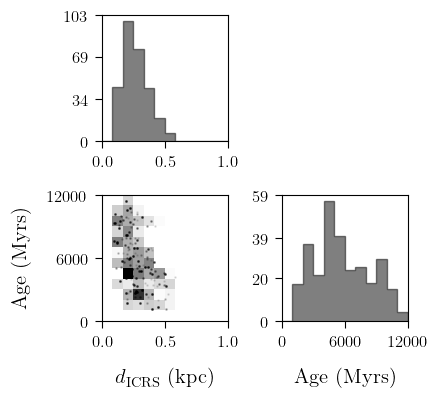

In [32]:
recoverability = []

dataset_main = Table.read('./02_results/GalacticDWDBeaming.ecsv')

for n_seed in range(10):
    dataset = dataset_main.copy()
    dataset['beaming_falseAlarmProbab'] = dataset_main['beaming_falseAlarmProbab'][:,n_seed]
    dataset['beaming_period'] = dataset['beaming_period'][:,n_seed]

    dataset = dataset[(-0.03<dataset['beaming_falseAlarmProbab'])*\
                      (dataset['beaming_falseAlarmProbab']<1e-5)*\
                      (dataset['r']<20)]

    dataset = dataset['d_ICRS','age']

    recoverability.append(np.array([list(row) for row in dataset]))

recoverability = np.concatenate(recoverability)

bins = 12
N_DIM = 2
PARAM_LABELS = [r"$d_\mathrm{ICRS}$ (kpc)", r"Age (Myrs)"]

limits = [[0,1],[0,12000]]

for ii in range(N_DIM):
    recoverability = recoverability[(limits[ii][0]<=recoverability[:,ii])*\
                                    (recoverability[:,ii]<=limits[ii][1])]

fig, axes = plt.subplots(N_DIM, N_DIM, figsize=(N_DIM*2, N_DIM*2), sharex='col')

fig.subplots_adjust(left=0.08, right=0.98,bottom=0.08, top=0.98,hspace=0.0, wspace=0.0)

for row in range(N_DIM):
    for col in range(N_DIM):
        ax = axes[row, col]
        
        ax.tick_params(axis='both', which='major', length=5, labelsize=12)
        
        if col > row:
            ax.set_visible(False)
            continue
            
        elif col == row:
            
            pos = ax.get_position()
            new_pos = [pos.x0 + pos.width * 0.1, pos.y0 + pos.height * 0.05, \
                       pos.width * 0.7, pos.height * 0.7] # Shrink width, increase height
            ax.set_position(new_pos)
            
            ax.hist(recoverability[:,col], \
                    bins=np.linspace(limits[col][0],limits[col][1],bins+1), \
                    histtype='step', fill=True, color='k', edgecolor='k', alpha=0.5, \
                    weights=np.ones(len(recoverability[:,col]))*0.1*4)
            _ymin,_ymax = ax.set_ylim()
            idx = np.round(np.linspace(_ymin,_ymax, 4),0)
            ax.set_yticks(idx)  
        
        else:
            
            pos = ax.get_position()
            new_pos = [pos.x0 + pos.width * 0.1, pos.y0 + pos.height * 0.05, \
                       pos.width * 0.7, pos.height * 0.7]
            ax.set_position(new_pos)
                        
            ax.hist2d(recoverability[:,col], recoverability[:,row], \
                      bins=[np.linspace(limits[col][0],limits[col][1],bins+1),\
                            np.linspace(limits[row][0],limits[row][1],bins+1)],\
                      cmap='binary')
            
            ax.scatter(recoverability[:,col], recoverability[:,row], \
                       color='k', marker='.', s=3, alpha=0.1, rasterized=True)
            
            ax.set_ylim(*limits[row])
            
            idx = np.round(np.linspace(limits[row][0], limits[row][1], 3),1)
            ax.set_yticks(idx)
            
        ax.set_xlim(*limits[col])
              
        idx = np.round(np.linspace(limits[col][0], limits[col][1], 3),1)
        ax.set_xticks(idx)      
        
        if row < N_DIM - 1:
            ax.tick_params(axis='x', labelbottom=False)
        else:
            ax.set_xlabel(PARAM_LABELS[col], fontsize=15, labelpad=12)

        if col > 0 or row == 0:
            ax.tick_params(axis='y', labelleft=False)
        else:
            ax.set_ylabel(PARAM_LABELS[row], fontsize=15, labelpad=12)
            
        if col == row:
            ax.tick_params(axis='y', labelleft=True)
            ax.tick_params(axis='x', labelbottom=True)

plt.savefig('02_Results/corner_dzage.pdf',bbox_inches='tight')

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u


dataset_main = Table.read('./02_results/GalacticDWDBeaming.ecsv')

dbfile = './01_Data/baseline_v5.0.0_10yrs.fits'
df_table = Table(astropy.io.fits.open(dbfile)[1].data)

76


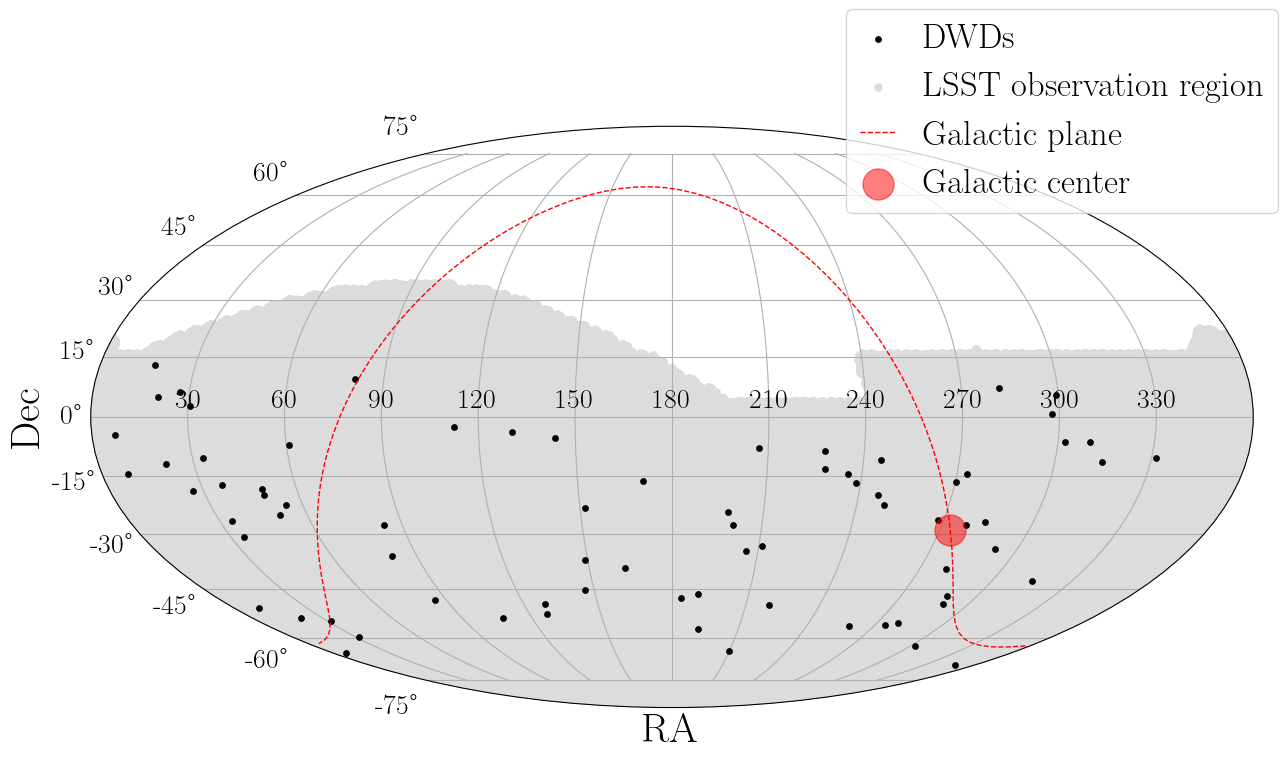

In [34]:

ra = []
dec = []

for n_seed in [5]:
    dataset = dataset_main.copy()
    dataset['beaming_falseAlarmProbab'] = dataset_main['beaming_falseAlarmProbab'][:,n_seed]
    dataset['beaming_period'] = dataset['beaming_period'][:,n_seed]

    dataset = dataset[(-0.03<dataset['beaming_falseAlarmProbab'])*\
                      (dataset['beaming_falseAlarmProbab']<1e-5)*\
                      (dataset['r']<20)]

    dataset = dataset['RA_ICRS','DEC_ICRS']

    ra.append(list(dataset['RA_ICRS']))
    dec.append(list(dataset['DEC_ICRS']))

ra = np.concatenate(ra)
dec = np.concatenate(dec)

print(len(ra))

# 2. Convert to radians and shift RA for Mollweide
# Mollweide expects:
# RA in radians: -pi to pi (longitude)
# Dec in radians: -pi/2 to pi/2 (latitude)
coords = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='icrs')
ra_rad = coords.ra.wrap_at(180 * u.deg).radian
dec_rad = coords.dec.radian

# 3. Create the plot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='mollweide')
ax.grid(True,zorder=0)
ax.set_axisbelow(True)

# 4. Scatter plot
ax.scatter(-ra_rad, dec_rad, marker='o', s=15, color='k',label='DWDs')

ra = df_table['fieldRA']
dec = df_table['fieldDec']
coords = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='icrs')
ra_rad = coords.ra.wrap_at(180 * u.deg).radian
dec_rad = coords.dec.radian
ax.scatter(-ra_rad, dec_rad, marker='.', color='gainsboro',zorder=-1,label='LSST observation region',\
           rasterized=True)

coords = SkyCoord(l=np.linspace(-62,360-62,100,endpoint=False)*u.degree, b=0*u.degree, frame='galactic').icrs
ra_rad = coords.ra.wrap_at(180 * u.deg).radian
dec_rad = coords.dec.radian
ax.plot(-ra_rad, dec_rad, ls='--', color='r',label='Galactic plane')


coords = SkyCoord(l=0*u.degree, b=0*u.degree, frame='galactic').icrs
ra_rad = coords.ra.wrap_at(180 * u.deg).radian
dec_rad = coords.dec.radian
ax.scatter(-ra_rad, dec_rad, marker='o', alpha=0.5, s=500, color='r',label='Galactic center')

# Optional: Add axis labels
ax.set_xlabel('RA',fontsize=30)
ax.set_ylabel('Dec',fontsize=30)

ax.set_xticklabels(labels=np.arange(180-150,180+180,30))

#plt.title('Distribution of DWDs in the galaxy')

ax.legend(fontsize=25,loc=(0.65, 0.85))

fig.savefig('02_Results/GalaticDistributionDWDs.pdf',bbox_inches='tight')

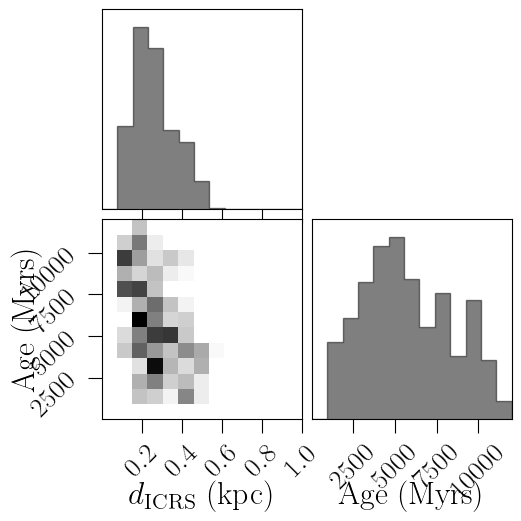

In [35]:
import corner

corner.corner(recoverability,labels=PARAM_LABELS,bins=13,\
              plot_contours=False,
              plot_density=True,
              plot_datapoints=False,
              fill_contours=True,
              pcolor_kwargs={'alpha': 1,'zorder':1},
              hist_kwargs={'fill': True, 'alpha': 0.5},
              range=limits);